In [1]:
#### Starting Again...
# Using a sample dataset on Kaggle... 2017-passout-data-analysis...

#### ADS_ Project data set resumed
### As a data analysis project
## 


#### Asking questions following the format of a Kaggle dataset...


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mp 
import numpy as np
from collections import Counter
import re
import string
import warnings
warnings.filterwarnings("ignore")

# Set jupyter's max row display
pd.set_option('display.max_row', 1000)

# Set jupyter's max column width to 50
pd.set_option('display.max_columns', 50)

plt.style.use('ggplot')
%matplotlib inline

In [3]:
#data_2017 = pd.read_csv('../input/2017_Batch.xlsx')
#data_2017.head()
dp_ads = pd.read_csv('Data_ADS_Project_Total_CleanedAug2023.csv')
dp_ads.head() 

,Serial Number,Date of entry,Gender,Languages Spoken,Class,Year of Entry,Language with Parents,Language with Siblings,Language with Friends,Language in School,First English at,Comprehension 1,Comprehension 2,Comprehension 3,Comprehension 4,Comprehension 5,Unnamed: 16
0,1.0,17/02/2023,F,"English, Yoruba",5,2018.0,"English, Yoruba","English, Yoruba","English, Yoruba",English,At home,1,1,1,1,1,NaN
1,2.0,17/02/2023,M,"English, Yoruba, Pidgin English",4,2019.0,"English, Pidgin English","English, Pidgin English","English, Pidgin English",English,Primary School,1,1,1,1,1,NaN
2,3.0,17/02/2023,F,"English, Igbo",5,2018.0,"English, Igbo","English, Igbo",English,English,At home,1,1,1,1,1,NaN
3,4.0,17/02/2023,M,"English, Hausa, Bura",4,2019.0,"English, Bura",English,English,English,Play group,1,1,1,1,1,NaN
4,6.0,17/02/2023,M,"English, Pidgin English, Gbagyi",3,2020.0,"English, Pidgin English, Gbagyi","English, Pidgin English, Gbagyi","English, Pidgin English, Gbagyi",English,Primary School,1,1,1,0,1,NaN


# How many pupils were surveyed in this project?

In [4]:
dp_ads.shape

(1005, 17)

#### 1004 students (because of header row)
#### 17 columns (...for now)

### What do we have in this dataset?


In [5]:
list(dp_ads)


['Serial Number',
 'Date of entry',
 'Gender',
 'Languages Spoken',
 'Class',
 'Year of Entry',
 'Language with Parents',
 'Language with Siblings',
 'Language with Friends',
 'Language in School',
 'First English at ',
 'Comprehension 1',
 'Comprehension 2',
 'Comprehension 3',
 'Comprehension 4',
 'Comprehension 5',
 'Unnamed: 16']

### Are there missing values in this dataset?

In [6]:
#data_2017.isna().sum()
dp_ads.isna().sum()

Serial Number               11
Date of entry                6
Gender                       4
Languages Spoken             3
Class                        1
Year of Entry               40
Language with Parents        3
Language with Siblings      11
Language with Friends        5
Language in School          12
First English at             6
Comprehension 1             23
Comprehension 2             33
Comprehension 3             37
Comprehension 4             47
Comprehension 5             46
Unnamed: 16               1005
dtype: int64

### What to do about the missing data?


In [7]:
# come back to this

### What to do to correct wrong entries in Languages spoken column...


In [8]:
#data_2017['PERMANENT LOCATION (STATE)'].value_counts()
dp_ads['Languages Spoken'].value_counts()

English, Gbagyi                           147
Gbagyi                                    109
English                                    97
English, Tiv                               61
English, Hausa                             51
Hausa                                      42
Gbagyi, English                            42
Tiv                                        42
English, Yoruba                            31
English, Igbo                              27
Gbagyi, Hausa                              22
Fulfulde                                   14
Yoruba, English                            13
Igbo                                       13
English, Igala                             10
English, Gede                              10
Gbagyi, Pidgin English, Hausa               8
English, Gbagyi , Hausa                     8
Gede                                        8
Yoruba                                      8
Bassa                                       8
English, Hausa, Gede              

### English is a given, so all language combinations should include English... 
#### To correct this will require a long input statement


In [9]:
# To correct the wrong entries of English either spelling or missing ... 
#data_2017['PERMANENT LOCATION (STATE)'] = data_2017['PERMANENT LOCATION (STATE)'] .map({'WESTBENGAL':'WEST BENGAL',
#'WEST BENGAL':'WEST BENGAL', 'West Bengal':'WEST BENGAL', 'WEST-BENGAL':'WEST BENGAL',
#' WEST BENGAL':'WEST BENGAL', 'WB':'WEST BENGAL','West bengal':'WEST BENGAL', 'WEST BINGAL': 'WEST BENGAL',
#'               WEST BENGAL':'WEST BENGAL', '                WEST BENGAL':'WEST BENGAL','WEST BENGAL.':'WEST BENGAL',
#'               JHARKHAND':'JHARKHAND','BIHAR':'BIHAR','TRIPURA':'TRIPURA','JHARKHAND':'JHARKHAND','UTTARAKHAND':'UTTARAKHAND',
#'DELHI':'DELHI','INDIA':'INDIA'})
#data_2017['PERMANENT LOCATION (STATE)'].value_counts()

dp_ads['Languages Spoken'] = dp_ads['Languages Spoken'].map({'English, Gbagyi':'English, Gbagyi',
                                                             'Gbagyi': 'English, Gbagyi',
                                                             'English': 'English',
                                                             'English, Tiv':'English, Tiv',
                                                             'English, Hausa':'English, Hausa',
                                                             'Hausa':'English, Hausa',
                                                             'Tiv':'English, Tiv',
                                                             'Gbagyi, English':'English, Gbagyi',
                                                             'English, Yoruba':'English, Yoruba',
                                                             'English, Igbo':'English, Igbo',
                                                             'Gbagyi, Hausa':'English, Gbagyi, Hausa',
                                                             'Fulfulde':'English, Fulfulde',
                                                             'Igbo':'English:Igbo',
                                                             'Yoruba, English':'English, Yoruba',
                                                             'English, Igala':'English, Igala',
                                                             'English, Gede':'English, Gede',
                                                             'Gede':'English, Gede',
                                                             'Gbagyi, Pidgin English, Hausa':'English, Gbagyi, Hausa, Pidgin English',
                                                             'Bassa':'English, Bassa',
                                                             'Yoruba':'English, Yoruba',
                                                             'English, Gbagyi , Hausa':'English, Gbagyi, Hausa',
                                                             'English, Hausa, Gede':'English, Hausa, Gede',
                                                             'English, Bassa':'English, Bassa',
                                                             'Pidgin English, Hausa':'English, Hausa, Pidgin English',
                                                             'English, Idoma':'English, Idoma',
                                                             'English, Gbagyi':'English, Gbagyi',
                                                             'Igala':'English, Igala',
                                                             'Mada':'English, Mada',
                                                             'English, Tiv, Hausa':'English, Hausa, Tiv',
                                                             'Gade':'English, Gede',
                                                             'English, Gbagyi, Hausa':'English, Gbagyi, Hausa',
                                                             'Bajju':'English, Bajju',
                                                             'Jaba':'English, Jaba',
                                                             'Igbo, English':'English,Jaba',
                                                             'English,Hausa, Atarkar':'English, Atarkar, Hausa',
                                                             'Pidgin English, Gbagyi':'English, Gbagyi, Pidgin English',
                                                             'English, Gade':'English, Gede',
                                                             'Tiv, English':'English, Tiv',
                                                             'English, Hausa, Gbagyi':'English, Gbagyi, Hausa',
                                                             'Idoma':'English, Idoma',
                                                             'English, Fulfulde':'English, Fulfulde',
                                                             'English, Hausa, Idoma':'English, Hausa, Idoma',
                                                             'Bura':'English, Bura',
                                                             'English, Hausa, Tiv':'English, Hausa, Tiv',
                                                             'English, Edo':'English, Edo',
                                                             'English, Igede':'English, Igede',
                                                             'Hausa, English':'English, Hausa',
                                                             'Pidgin English':'English, Pidgin English',
                                                             'Angas':'English, Angas',
                                                             'Awo':'English, Awo',
                                                             'Pidgin English, Gede':'English, Gede, Pidgin English,',
                                                             'English, TIV':'English, Tiv',
                                                             'English, Tiv':'English, Tiv',
                                                             'Tiv, Hausa, Pidgin English':'English, Hausa, Pidgin English, Tiv',
                                                             'English, Tarok':'English, Tarok',
                                                             'Ahoe':'English, Ahoe',
                                                             'English, Hausa, Bura':'English, Bura, Hausa',
                                                             'Ebira':'English, Ebira',
                                                             'Gbagyi, Mada':'English, Gbagyi, Mada',
                                                             'English, Igon':'English, Igon',
                                                             'Englis, Hausa, Tiv':'English, Hausa, Tiv',
                                                             'Englis, Jabba , Hausa':'English, Hausa, Jaba',
                                                             'English, Madar':'English, Mada',
                                                             'Gbagyi, Gede':'English, Gbagyi, Gede',
                                                             'Kurama':'English, Kurama',
                                                             'Gbagyi,English,Hausa, Gade':'English, Gbagyi, Gede, Hausa',
                                                             'English, Amo, Hausa':'English, Amo, Hausa',
                                                             'Bassa, Gbagyi, English':'English, Bassa, Gbagyi',
                                                             'Nupe':'English, Nupe',
                                                             'English, Eggon':'English, Eggon',
                                                             'English, Pidgin English, Tiv':'English, Pidgin English, Tiv',
                                                             'English, Ron':'English, Ron',
                                                             'English, Gede, Fulfulde, Hausa':'English, Fulfulde, Gede, Hausa',
                                                             'English':'English',
                                                             'Gbagyi, Yoruba':'English, Gbagyi, Yoruba',
                                                             'Yoruba, Igbo':'English, Igbo, Yoruba',
                                                             'Kantana':'English, Kantana',
                                                             'English, Chawel':'English, Chawai',
                                                             'Yoruba ,English':'English, Yoruba',
                                                             'English, Ahor, Hausa':'English, Ahor, Hausa',
                                                             'English,Gbagyi,Hausa, Mada':'English, Gbagyi, Hausa, Mada',
                                                             'English, Akwa Ibom':'English, Akwa Ibom',
                                                             'English, Kilber':'English, Kilber',
                                                             'Attakar':'English, Attakar',
                                                             'English, Kaduna':'English, Kaduna',
                                                             'Basahge':'English, Bassange',
                                                             'English,Gbagyi,Hausa,Gade':'English, Gbagyi, Gede, Hausa',
                                                             'English, Hausa, Gusawa':'English, Gusawa, Hausa',
                                                             'English, Ijona, Pidgin English':'English, Ijon, Pidgin English',
                                                             'English, Hausa, Bajju':'English, Bajju, Hausa',
                                                             'Tiv':'English, Tiv',
                                                             'Hausa, Fulfude':'English, Fulfulde, Hausa',
                                                             'English, Hausa, Ebira':'English, Ebira, Hausa',
                                                             'English, Hausa, Eggon':'English, Eggon, Hausa',
                                                             'Kwala':'English, Kwala?',
                                                             'Nupe, English':'English, Nupe',
                                                             'Tiv, Gbagyi':'English, Gbagyi, Tiv',
                                                             ' English':'English',
                                                             'Ngas':'English, Ngas',
                                                             'Pidgin English, Gede, Hausa':'English, Gede, Hausa, Pidgin English',
                                                             'English,Pidin English,Hausa, Gede':'English, Gede, Hausa, Pidgin English',
                                                             'Edo':'English, Edo',
                                                             'English, Jaba':'English, Jaba',
                                                             'English, Hausa, Gbagyi, Pidgin English':'English, Gbagyi, Hausa, Pidgin English',
                                                             'English,Hausa,Fulfude':'English, Fulfulde, Hausa',
                                                             'Gade, English':'English, Gede',
                                                             'English,  Tiv, Hausa':'English, Hausa, Tiv',
                                                             'English ,Hausa, Gbagyi, Koro':'English, Gbagyi, Hausa, Koro',
                                                             'English, Yoruba, Gbagyi':'English, Gbagyi, Yoruba',
                                                             'English, Fulfulde, Hausa':'English, Fulfulde, Hausa',
                                                             'English, Hausa, Gbagyi, Afo':'English, Afo, Gbagyi, Hausa',
                                                             'English, Ngas':'English, Ngas',
                                                             'Gbagyi':'English, Gbagyi',
                                                             'Arago':'English, Arago',
                                                             'Bassa, English':'English, Bassa',
                                                             'Pidgin English, Hausa , Gede':'English, Gede, Hausa, Pidgin English',
                                                             'English, Yoruba, Pidgin English':'English, Pidgin English, Yoruba',
                                                             'English, Pidgin English, Gbagyi':'English, Gbagyi, Pidgin English',
                                                             'Hausa, Tiv':'English, Hausa, Tiv',
                                                             'Yoruba ,English, Fulfulde':'English, Fulfulde, Yoruba',
                                                             'Gbagyi, Pidgin English':'English, Gbagyi, Pidgin English',
                                                             'English, Cross River':'English, Cross River',
                                                             'Gbagyi,Hausa, English':'English, Gbagyi, Hausa',
                                                             ' Gbagyi, Hausa':'English, Gbagyi, Hausa',
                                                             'English, Kataf':'English, Kataf',
                                                             'Pidgin English, Hausa, Tiv':'English, Hausa, Pidgin English, Tiv',
                                                             'Boju':'English, Boju',
                                                             'English, Pidgin English, Gede':'English, Gede, Pidgin English',
                                                             'English, Basange':'English, Bassa Nge',
                                                             'Cantana':'English, Kantana',
                                                             'Hausa, English, Gbagyi':'English, Gbagyi, Hausa',
                                                             'Koro':'English, Koro',
                                                             'English, Margi': 'English, Margi',
                                                             'Gede, English':'English, Gede',
                                                             'Hausa, Fulfulde':'English, Fulfulde, Hausa',
                                                             'English, Ibibio(Akwa-Ibom':'English, Ibibio',
                                                             'Narm, Gbagyi':'English, Gbagyi, Narm',
                                                             'English, Hausa, Tarok':'English, Hausa, Tarok',
                                                             'Efik':'English, Efik',
                                                             'English, Bassa, Hausa':'English, Bassa, Hausa',
                                                             'Gbagyi,Hausa,Mada, English':'English, Gbagyi, Hausa, Mada',
                                                             'Gbagyi, Hausa':'English, Gbagyi, Hausa',
                                                             'English,Gbagyi, Mada':'English, Gbagyi, Mada',
                                                             'Chala':'English, Chala',
                                                             'Gbaagyi':'English, Gbagyi',
                                                             'English, Hausa, Fulani':'English, Fulfulde, Hausa',
                                                             'Igala, English':'English, Igala',
                                                             'Pidgin English, Hausa, Chawai':'English, Chawai, Hausa, Pidgin English',
                                                             'English, Ganagana':'English, Ganagana',
                                                             'Pidgin English, Hausa, Gbagyi':'English, Gbagyi, Hausa, Pidgin English',
                                                             'Englisha, Igbira':'English, Ebira',
                                                             'Gbagyi, Gade':'English, Gbagyi, Gede',
                                                             'Gbagy':'English, Gbagyi',
                                                             'English,Gbagyi, Tiv':'English, Hausa, Pidgin English, Tiv',
                                                             'Pidgin English,  Hausa, Tiv':'English, Hausa, Pidgin English, Tiv',
                                                             'English,Gbagyi, Hausa':'English, Gbagyi, Hausa',
                                                             '2018':'',
                                                             'English, Chawai':'English, Chawai',
                                                             'English, Tiv, Hausa':'English, Hausa, Tiv',
                                                             'English, Pidgin English':'English, Pidgin English',
                                                             'Katab':'English, Katab',
                                                             'Gbagyi  , Hausa':'English, Gbagyi, Hausa',
                                                             'English,Hausa, Adara':'English, Adara, Hausa',
                                                             'Hausa,Gbagyi, English':'English, Gbagyi, Hausa',
                                                             'English, Mada':'English, Mada',
                                                             'English, Hausa, Gwandara':'English, Gwandara, Hausa',
                                                             'Yoruba.':'English, Yoruba',
                                                             'English,Hausa, Yoruba':'English, Hausa, Yoruba',
                                                             'Gbagyi, Koro':'English, Gbagyi, Koro',
                                                             'Kwol':'English, Kwol'
                                                            })
                                                                                
 # Took over 2 hours!!

In [10]:
# Redo value counts with languages processed...20-10-2023
dp_ads['Languages Spoken'].value_counts()

English, Gbagyi                           300
English, Tiv                              108
English                                    98
English, Hausa                             95
English, Yoruba                            54
English, Gbagyi, Hausa                     43
English, Gede                              27
English, Igbo                              27
English, Fulfulde                          17
English, Igala                             16
English, Bassa                             15
English:Igbo                               13
English, Hausa, Tiv                        10
English, Gbagyi, Hausa, Pidgin English     10
English, Idoma                              9
English, Hausa, Gede                        7
English, Mada                               7
English, Hausa, Pidgin English              6
English, Gbagyi, Pidgin English             5
English, Hausa, Pidgin English, Tiv         5
English, Bajju                              4
English, Jaba                     

Text(0.5, 1.0, 'Language varieties spoken by Primary School Pupils Surveyed')

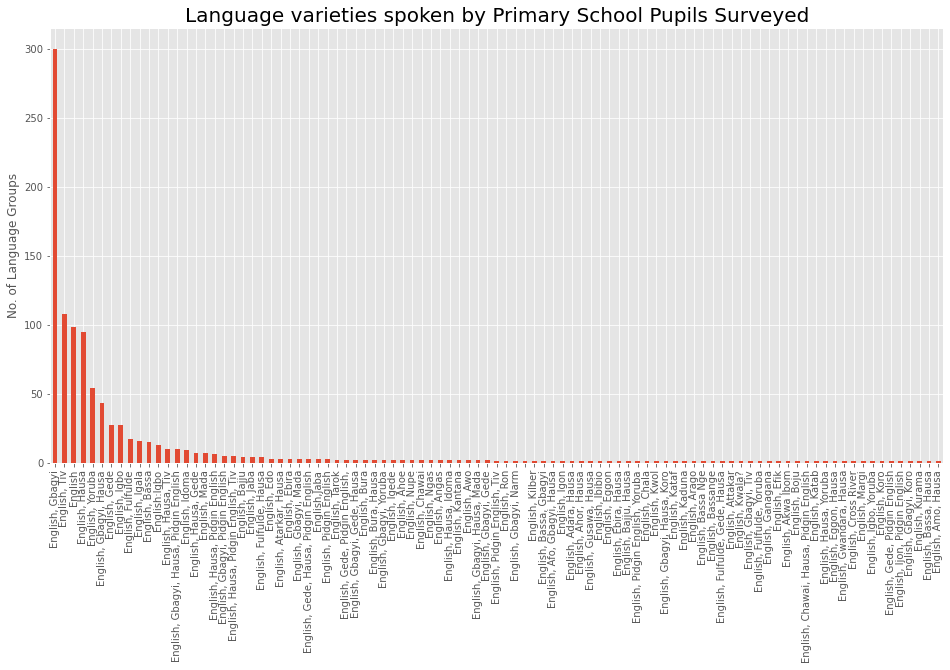

In [11]:
# Neater output...
# Time to plot

#subplot = data_2017['PERMANENT LOCATION (STATE)'].value_counts().plot(kind='barh',figsize=(12,8))
#subplot.set_ylabel('')
#subplot.set_title('State-wise Distribution of Students', fontsize = 20)

subplot = dp_ads['Languages Spoken'].value_counts().plot(kind='bar',figsize=(16,8))
subplot.set_ylabel('No. of Language Groups')
subplot.set_title('Language varieties spoken by Primary School Pupils Surveyed', fontsize = 20)


#### This graph doesnt really say much more than that "English, Gbagyi" is the language combination with the highest number of speakers. 300!  This is followed by  "English, Tiv"; "English" (only); and "English, Hausa" with about 100 speakers in each group. 

#### We need to find a way to show the unique languages listed here...

In [12]:
#df[["Score1", "Score2", "Score3"]] = df["score"].str.split(",", expand=True)
dp_ads[["Lang1", "Lang2", "Lang3", "Lang4"]] = dp_ads["Languages Spoken"].str.split(",", expand=True)
# ref...https://medium.com/@akaivdo/how-to-split-one-column-to-multiple-columns-in-pandas-3c857b47fbde

In [13]:
dp_ads.head()

,Serial Number,Date of entry,Gender,Languages Spoken,Class,Year of Entry,Language with Parents,Language with Siblings,Language with Friends,Language in School,First English at,Comprehension 1,Comprehension 2,Comprehension 3,Comprehension 4,Comprehension 5,Unnamed: 16,Lang1,Lang2,Lang3,Lang4
0,1.0,17/02/2023,F,"English, Yoruba",5,2018.0,"English, Yoruba","English, Yoruba","English, Yoruba",English,At home,1,1,1,1,1,NaN,English,Yoruba,None,None
1,2.0,17/02/2023,M,"English, Pidgin English, Yoruba",4,2019.0,"English, Pidgin English","English, Pidgin English","English, Pidgin English",English,Primary School,1,1,1,1,1,NaN,English,Pidgin English,Yoruba,None
2,3.0,17/02/2023,F,"English, Igbo",5,2018.0,"English, Igbo","English, Igbo",English,English,At home,1,1,1,1,1,NaN,English,Igbo,None,None
3,4.0,17/02/2023,M,"English, Bura, Hausa",4,2019.0,"English, Bura",English,English,English,Play group,1,1,1,1,1,NaN,English,Bura,Hausa,None
4,6.0,17/02/2023,M,"English, Gbagyi, Pidgin English",3,2020.0,"English, Pidgin English, Gbagyi","English, Pidgin English, Gbagyi","English, Pidgin English, Gbagyi",English,Primary School,1,1,1,0,1,NaN,English,Gbagyi,Pidgin English,None


#### Having split the Languages Spoken column into Lang1, Lang2, Lang3, Lang 4, with Lang1 being English as the official language... Now to do a summary of other languages...

In [14]:
languages1 = dp_ads["Lang1"].nunique()
print("1st language column: ", languages1)

languages2 = dp_ads["Lang2"].nunique()
print("2nd language column: ",languages2)

languages3 = dp_ads["Lang3"].nunique()
print("3rd language column: ",languages3)

languages4 = dp_ads["Lang4"].nunique()
print("4th language column: ",languages4)


1st language column:  3
2nd language column:  59
3rd language column:  11
4th language column:  7


###### Can this be? 80 different languages. But 1st language column should have been 1. 
###### 1 unique language - English.

In [15]:
# with 80(?) total distinct languages, how best can i do this...
lang_list1 = dp_ads["Lang1"].unique()
lang_list1

array(['English', nan, '', 'English:Igbo'], dtype=object)

In [16]:
# with 59 in column 2...
lang_list2 = dp_ads["Lang2"].unique()
lang_list2

array([' Yoruba', ' Pidgin English', ' Igbo', ' Bura', ' Gbagyi',
       ' Idoma', ' Ijon', None, ' Hausa', ' Tiv', nan, ' Akwa Ibom',
       ' Igala', ' Amo', ' Tarok', ' Fulfulde', ' Ngas', ' Mada',
       ' Cross River', ' Bassa', ' Eggon', ' Igon', ' Kilber', ' Igede',
       ' Gede', ' Ebira', ' Nupe', ' Jaba', ' Bassange', ' Koro',
       ' Kantana', ' Ganagana', ' Gusawa', 'Jaba', ' Chawai', ' Attakar',
       ' Kurama', ' Bajju', ' Chala', ' Ahor', ' Bassa Nge', ' Afo',
       ' Arago', ' Kwala?', ' Gwandara', ' Kwol', ' Kaduna', ' Edo',
       ' Angas', ' Ahoe', ' Ron', ' Boju', ' Awo', ' Efik', ' Ibibio',
       ' Kataf', ' Adara', ' Atarkar', ' Margi', ' Katab'], dtype=object)

##### This implies about 60 unique languages in the column titled "Language spoken with Parents"...

In [17]:
# can i do a graph with this?
dp_ads['Lang2'].value_counts()


 Gbagyi            373
 Hausa             126
 Tiv               108
 Yoruba             54
 Gede               33
 Igbo               28
 Fulfulde           23
 Bassa              17
 Igala              16
 Idoma               9
 Mada                7
 Bajju               5
 Pidgin English      5
 Ebira               4
 Bura                4
 Jaba                4
 Edo                 3
Jaba                 3
 Chawai              3
 Atarkar             3
 Nupe                2
 Angas               2
 Awo                 2
 Ahoe                2
 Eggon               2
 Kantana             2
 Ngas                2
 Tarok               2
 Igede               2
 Igon                1
 Attakar             1
 Adara               1
 Kwala?              1
 Gusawa              1
 Arago               1
 Ijon                1
 Akwa Ibom           1
 Efik                1
 Kwol                1
 Amo                 1
 Afo                 1
 Ron                 1
 Chala               1
 Cross Rive

Text(0.5, 1.0, 'Languages spoken by Primary School Pupils')

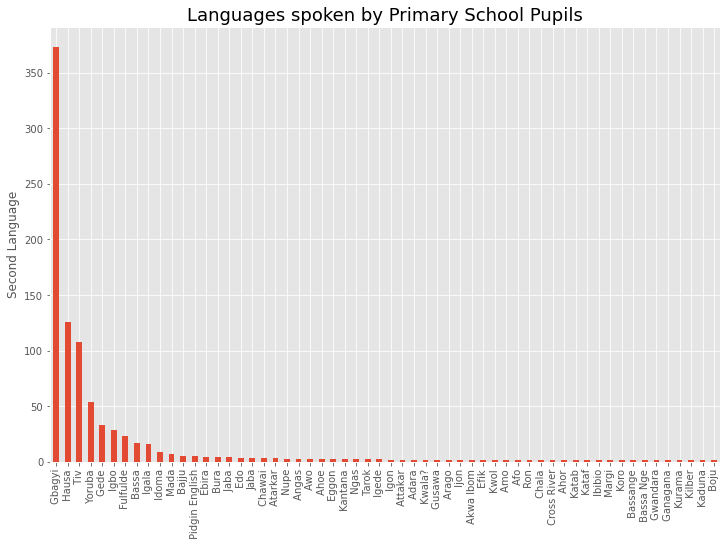

In [18]:
lang2plot = dp_ads['Lang2'].value_counts().plot(kind='bar',figsize=(12,8))
lang2plot.set_ylabel('Second Language')
lang2plot.set_title('Languages spoken by Primary School Pupils', fontsize = 18)

In [19]:
# Language Column 3 
dp_ads['Lang3'].value_counts()


 Hausa             78
 Pidgin English    20
 Gede              12
 Tiv               12
 Yoruba             6
 Mada               3
 Idoma              2
 Gbagyi             2
 Koro               1
 Narm               1
Name: Lang3, dtype: int64

Text(0.5, 1.0, 'Other Languages spoken by Primary School Pupils')

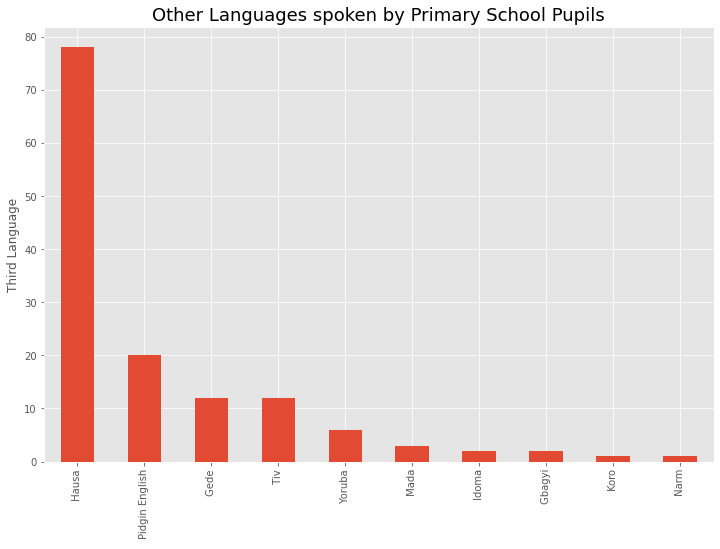

In [20]:
lang3plot = dp_ads['Lang3'].value_counts().plot(kind='bar',figsize=(12,8))
lang3plot.set_ylabel('Third Language')
lang3plot.set_title('Other Languages spoken by Primary School Pupils', fontsize = 18)

In [21]:
# 4th Language column
dp_ads['Lang4'].value_counts()


 Pidgin English    14
 Tiv                5
 Hausa              4
 Mada               2
                    2
 Koro               1
Name: Lang4, dtype: int64

Text(0.5, 1.0, 'More Languages spoken by Primary School Pupils')

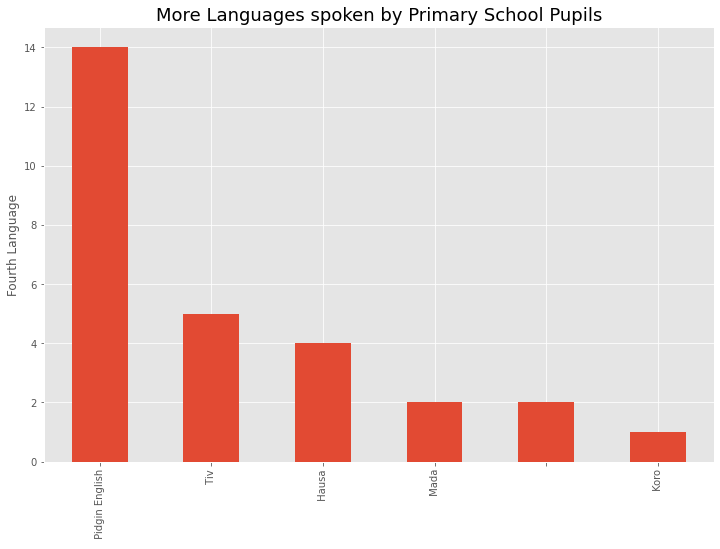

In [22]:
lang4plot = dp_ads['Lang4'].value_counts().plot(kind='bar',figsize=(12,8))
lang4plot.set_ylabel('Fourth Language')
lang4plot.set_title('More Languages spoken by Primary School Pupils', fontsize = 18)

#### These graphs and value counts just show the breakdown of languages. But how many pupils speak Mada, Berom, Pidgin English... ?


In [23]:
#toppers = data_2017.groupby('Department')['SEM AVG'].transform(max) == data_2017['SEM AVG']
#data_2017[toppers][['Department', 'SEM AVG',
#                    'ACTUAL % OF CLASS XII','NAME OF BOARD/COUNCIL - CLASS XII']]

#df2 = df.groupby(['Courses','Duration'])['Fee'].count()
#print(df2)
lang_count = dp_ads.groupby(['Lang2','Lang3', 'Lang4'])['Comprehension 1'].count()
print(lang_count)

Lang2      Lang3            Lang4          
 Afo        Gbagyi           Hausa              1
 Chawai     Hausa            Pidgin English     1
 Fulfulde   Gede             Hausa              1
 Gbagyi     Gede             Hausa              2
            Hausa            Koro               1
                             Mada               2
                             Pidgin English    10
 Gede       Hausa            Pidgin English     3
            Pidgin English                      2
 Hausa      Pidgin English   Tiv                5
Name: Comprehension 1, dtype: int64


#### What do i do or show with this data? How do the number of languages spoken affect comprehension?
###### What does the background language show regarding English comprehension
###### How many languages are spoken by these 1000 pupils? (This is an after thought...)
###### What can i use this for in a machine language model?

In [24]:
Lang2_chart=dp_ads.Lang2.value_counts()
print(Lang2_chart)

 Gbagyi            373
 Hausa             126
 Tiv               108
 Yoruba             54
 Gede               33
 Igbo               28
 Fulfulde           23
 Bassa              17
 Igala              16
 Idoma               9
 Mada                7
 Bajju               5
 Pidgin English      5
 Ebira               4
 Bura                4
 Jaba                4
 Edo                 3
Jaba                 3
 Chawai              3
 Atarkar             3
 Nupe                2
 Angas               2
 Awo                 2
 Ahoe                2
 Eggon               2
 Kantana             2
 Ngas                2
 Tarok               2
 Igede               2
 Igon                1
 Attakar             1
 Adara               1
 Kwala?              1
 Gusawa              1
 Arago               1
 Ijon                1
 Akwa Ibom           1
 Efik                1
 Kwol                1
 Amo                 1
 Afo                 1
 Ron                 1
 Chala               1
 Cross Rive

In [25]:
dp_ads.isna().sum()

Serial Number               11
Date of entry                6
Gender                       4
Languages Spoken            18
Class                        1
Year of Entry               40
Language with Parents        3
Language with Siblings      11
Language with Friends        5
Language in School          12
First English at             6
Comprehension 1             23
Comprehension 2             33
Comprehension 3             37
Comprehension 4             47
Comprehension 5             46
Unnamed: 16               1005
Lang1                       18
Lang2                      130
Lang3                      868
Lang4                      977
dtype: int64

In [26]:
dp_ads.head()


,Serial Number,Date of entry,Gender,Languages Spoken,Class,Year of Entry,Language with Parents,Language with Siblings,Language with Friends,Language in School,First English at,Comprehension 1,Comprehension 2,Comprehension 3,Comprehension 4,Comprehension 5,Unnamed: 16,Lang1,Lang2,Lang3,Lang4
0,1.0,17/02/2023,F,"English, Yoruba",5,2018.0,"English, Yoruba","English, Yoruba","English, Yoruba",English,At home,1,1,1,1,1,NaN,English,Yoruba,None,None
1,2.0,17/02/2023,M,"English, Pidgin English, Yoruba",4,2019.0,"English, Pidgin English","English, Pidgin English","English, Pidgin English",English,Primary School,1,1,1,1,1,NaN,English,Pidgin English,Yoruba,None
2,3.0,17/02/2023,F,"English, Igbo",5,2018.0,"English, Igbo","English, Igbo",English,English,At home,1,1,1,1,1,NaN,English,Igbo,None,None
3,4.0,17/02/2023,M,"English, Bura, Hausa",4,2019.0,"English, Bura",English,English,English,Play group,1,1,1,1,1,NaN,English,Bura,Hausa,None
4,6.0,17/02/2023,M,"English, Gbagyi, Pidgin English",3,2020.0,"English, Pidgin English, Gbagyi","English, Pidgin English, Gbagyi","English, Pidgin English, Gbagyi",English,Primary School,1,1,1,0,1,NaN,English,Gbagyi,Pidgin English,None


In [27]:
dp_ads['Language with Parents'].value_counts()

Gbagyi                                    238
English                                   176
Tiv                                        82
Hausa                                      63
English, Hausa                             54
English, Gbagyi                            41
Pidgin English                             24
English,Pidgin English, Hausa              24
Gede                                       23
English, Yoruba                            23
Yoruba                                     17
English, Tiv                               13
English, Pidgin English                    11
Bassa                                      10
English, Igbo                              10
Gbagyi, Pidgin English, Hausa               8
Igala                                       6
Gbagyi, Hausa                               6
Pidgin English, Gbagyi                      6
Pidgin English, Hausa                       6
Fulfulde                                    6
Idoma                             

In [28]:
#  To run another "map" session so that all langauge combinations are properly spelt...etc
# that would take so long! Every single entry in the column (1001+) re-entered... Best to try "find-replace" for pandas
# # By using str.replace()
#df['Courses'] = df['Courses'].str.replace('Language','Lang')

dp_ads['Language with Parents'] = dp_ads['Language with Parents'].str.replace('Ibo', 'Igbo')

#dp_ads['Language with Parents']= dp_ads['Language with Parents'].str.replace('Ibo', 'Igbo')
#dp_ads['Language with Parents'].value_counts() 
# Great!! this str.replace works... now to find all the other misspelled quotes

dp_ads['Language with Parents'] = dp_ads['Language with Parents'].str.replace('Enlish', 'English')
dp_ads['Language with Parents'] = dp_ads['Language with Parents'].str.replace('Ennglish', 'English')
dp_ads['Language with Parents'] = dp_ads['Language with Parents'].str.replace('Gade', 'Gede')
dp_ads['Language with Parents'] = dp_ads['Language with Parents'].str.replace('TIV', 'Tiv')
dp_ads['Language with Parents'] = dp_ads['Language with Parents'].str.replace('Pidgin,', 'Pidgin English,')
dp_ads['Language with Parents'] = dp_ads['Language with Parents'].str.replace('Yoruba ansd English', 'English, Yoruba')
dp_ads['Language with Parents'] = dp_ads['Language with Parents'].str.replace('English, Hausa, Pidgin', 'English, Hausa, Pidgin English')
dp_ads['Language with Parents'] = dp_ads['Language with Parents'].str.replace('English,Gbagyi,Pidgin, Hausa', 'English, Gbagyi, Hausa, Pidgin English')
dp_ads['Language with Parents'] = dp_ads['Language with Parents'].str.replace('English, Pidgin, Hausa', 'English, Hausa, Pidgin English')
dp_ads['Language with Parents'] = dp_ads['Language with Parents'].str.replace('English,Pidgin English, Hausa', 'English, Hausa, Pidgin English')


#Check
dp_ads['Language with Parents'].value_counts()

Gbagyi                                    238
English                                   178
Tiv                                        84
Hausa                                      63
English, Hausa                             54
English, Gbagyi                            41
Gede                                       26
English, Hausa, Pidgin English             26
English, Yoruba                            25
Pidgin English                             24
Yoruba                                     17
English, Igbo                              14
English, Tiv                               13
English, Pidgin English                    11
Bassa                                      10
Gbagyi, Pidgin English, Hausa               8
Gbagyi, Hausa                               6
Igala                                       6
Pidgin English, Hausa                       6
Pidgin English, Gbagyi                      6
Idoma                                       6
Igbo                              

In [29]:
dp_ads['Language with Parents'].isna().sum()

3

In [30]:
# TO check how many individual (unique) languages in the column "Language with Parents"

lang_parents_all = dp_ads["Language with Parents"].unique()
lang_parents_all

array(['English, Yoruba', 'English, Pidgin English', 'English, Igbo',
       'English, Bura', 'English, Pidgin English, Gbagyi',
       'English, Gbagyi, Hausa', 'Yoruba', 'English, Idoma', 'Gbagyi',
       'English, Ijona, Pidgin English', 'English',
       'English, Hausa, Bura', 'English, Hausa', 'English, Tarok',
       'Tarok', 'Tiv, English', 'Hausa, Fulfude', 'Fulfulde, Hausa',
       'English, Gbagyi', 'Hausa, Gbagyi', 'Pidgin English',
       'English, Igala', 'Ngas', 'Hausa', 'Igon', 'Hausa, Jabba',
       'Kilber', 'Tiv', 'Igede', 'Igala', 'Idoma', 'Bassa', 'Bassa ',
       'Fulani', 'English, Mada', 'English,Hausa,Pidgin ,Gede, Tiv',
       'english,Mada, Hausa', 'English,Hausa,Gbagyi', 'Gbagyi, Hausa',
       'English,Gede, Hausa', 'Gede,Hausa, English', 'English,Hausa, Tiv',
       'Gbagyi,Hausa,English', nan, 'Mada', 'English  ', 'English, Tiv',
       'Hausa, English, Gbagyi', 'English, Hausa, Gbagyi, Pidgin English',
       'English , Hausa', 'Gbagyi, Pidgin English, H

In [31]:
# These are unique language groups... need unique languages!
# Need to split the column "Labguage with Parents"... here goes...
## new df from the column of lists
#split_df = pd.DataFrame(df['Values'].tolist(), columns=['v1', 'v2', 'v3'])
# display the resulting df
#split_df
# ref... https://datascienceparichay.com/article/split-pandas-column-of-lists-into-multiple-columns/
# This didnt work... so back to...

##df[["Score1", "Score2", "Score3"]] = df["score"].str.split(",", expand=True)
#dp_ads[["Lang1", "Lang2", "Lang3", "Lang4"]] = dp_ads["Languages Spoken"].str.split(",", expand=True)
# ref...https://medium.com/@akaivdo/how-to-split-one-column-to-multiple-columns-in-pandas-3c857b47fbde


dp_ads[["Langp_1", "Langp_2", "Langp_3", "Langp_4", "Langp_5"]] = dp_ads['Language with Parents'].str.split(",", expand=True)

In [32]:
dp_ads.head()


,Serial Number,Date of entry,Gender,Languages Spoken,Class,Year of Entry,Language with Parents,Language with Siblings,Language with Friends,Language in School,First English at,Comprehension 1,Comprehension 2,Comprehension 3,Comprehension 4,Comprehension 5,Unnamed: 16,Lang1,Lang2,Lang3,Lang4,Langp_1,Langp_2,Langp_3,Langp_4,Langp_5
0,1.0,17/02/2023,F,"English, Yoruba",5,2018.0,"English, Yoruba","English, Yoruba","English, Yoruba",English,At home,1,1,1,1,1,NaN,English,Yoruba,None,None,English,Yoruba,None,None,None
1,2.0,17/02/2023,M,"English, Pidgin English, Yoruba",4,2019.0,"English, Pidgin English","English, Pidgin English","English, Pidgin English",English,Primary School,1,1,1,1,1,NaN,English,Pidgin English,Yoruba,None,English,Pidgin English,None,None,None
2,3.0,17/02/2023,F,"English, Igbo",5,2018.0,"English, Igbo","English, Igbo",English,English,At home,1,1,1,1,1,NaN,English,Igbo,None,None,English,Igbo,None,None,None
3,4.0,17/02/2023,M,"English, Bura, Hausa",4,2019.0,"English, Bura",English,English,English,Play group,1,1,1,1,1,NaN,English,Bura,Hausa,None,English,Bura,None,None,None
4,6.0,17/02/2023,M,"English, Gbagyi, Pidgin English",3,2020.0,"English, Pidgin English, Gbagyi","English, Pidgin English, Gbagyi","English, Pidgin English, Gbagyi",English,Primary School,1,1,1,0,1,NaN,English,Gbagyi,Pidgin English,None,English,Pidgin English,Gbagyi,None,None


In [33]:
#"Langp_1", "Langp_2", "Langp_3", "Langp_4", "Langp_5"

Langp1_chart=dp_ads.Langp_1.value_counts()
print("This is the first column of Language spoken with parents")
print(Langp1_chart)

Langp2_chart=dp_ads.Langp_2.value_counts()
print("This is the second column of Language spoken with parents")
print(Langp2_chart)

This is the first column of Language spoken with parents
English           407
Gbagyi            257
Tiv                87
Hausa              74
Pidgin English     45
Gede               27
Yoruba             17
Bassa              11
Fulfulde            8
Idoma               7
Igbo                6
Igala               6
Jaba                3
Mada                3
Nupe                2
Ngas                2
Chawel              2
Bassa               2
English             2
Tarok               2
Awo                 2
Fulani              1
Afo                 1
Gede.               1
Ebira               1
Ganagana            1
Fulfude             1
Artakar             1
Gusawa              1
Chamba              1
Engliish            1
Igon                1
Tiv                 1
Enghlish            1
Igede               1
Efik                1
Kilber              1
Nil                 1
Katab               1
Kwala               1
Gwandara            1
Eggon               1
Fululde            

In [37]:
#df.groupby("variable").sum()["count"]
dp_ads.groupby("Langp_2").sum(["count"])

,Serial Number,Year of Entry,Unnamed: 16
Langp_2,,,
Hausa,607.0,2019.0,0.0
Ahoe,671.0,2019.0,0.0
Atarkar,2217.0,6059.0,0.0
Bajju,481.0,2017.0,0.0
Basange,611.0,2017.0,0.0
Bura,4.0,2019.0,0.0
Chawai,969.0,4037.0,0.0
Edo,706.0,2022.0,0.0
English,3477.0,18163.0,0.0


In [ ]:
# Still a few typos...